[0, 2.0, 3.025, 3.6, 4.17, 4.645, 5.06, 5.495, 5.84, 6.185, 6.545, 6.935, 7.195, 7.49, 7.81, 8.065, 8.27, 8.515, 8.735, 9.005, 9.21, 9.505, 9.675, 9.89, 10.145, 10.355, 10.535, 10.785, 10.97, 11.18, 11.35, 11.56, 11.77, 11.955, 12.125, 12.285, 12.475, 12.63, 12.8, 12.94, 13.185, 13.325, 13.46, 13.56, 13.69, 13.845, 14.015, 14.145, 14.34, 14.5, 14.635, 14.74, 14.87, 15.025, 15.195, 15.29, 15.455, 15.565, 15.75, 15.9, 16.045, 16.215, 16.345, 16.495, 16.575, 16.7, 16.825, 16.96, 17.09, 17.235, 17.36, 17.49, 17.555, 17.65, 17.78, 17.9, 18.0, 18.08, 18.19, 18.325, 18.465, 18.57, 18.76, 18.9, 19.015, 19.155, 19.26, 19.355, 19.435, 19.54, 19.69, 19.78, 19.845, 19.94, 20.045, 20.115, 20.205, 20.31, 20.415, 20.48, 20.62, 20.74, 20.855, 21.0, 21.07, 21.195, 21.31, 21.44, 21.515, 21.66, 21.75, 21.86, 21.94, 22.095, 22.275, 22.345, 22.48, 22.55, 22.62, 22.745, 22.83, 22.945, 22.985, 23.095, 23.205, 23.305, 23.33, 23.41, 23.5, 23.57, 23.68, 23.725, 23.82, 23.885, 23.97, 24.06, 24.14, 24.29, 24.375,

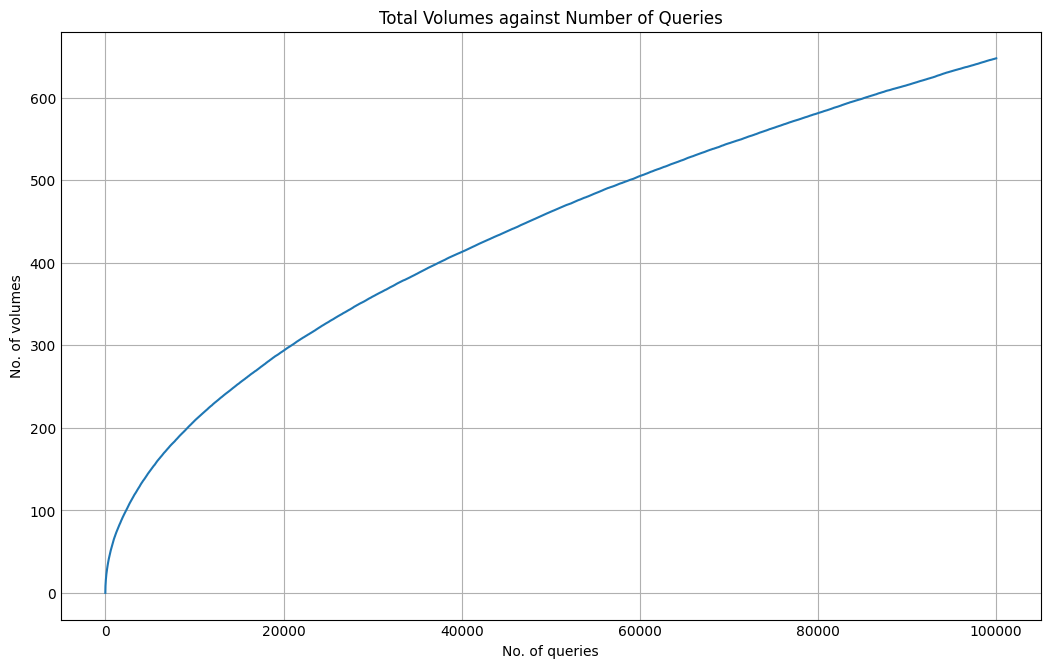

In [2]:
import math
import random 
import matplotlib.pyplot as plt 

RSEmax = 2048

def is_power_of_two(x):
    return (x & (x - 1)) == 0

def overcover(start, end):
    diff = (end - start) - 1
    while True:
        diff += 1
        if is_power_of_two(diff + 1):  # Check if diff + 1 is a power of 2
            N = math.log(diff + 1, 2)
            break
    if start == end:
        return (start, end)
    else:
        for i in range(int(N), int(math.log(RSEmax, 2)) + 1):  # Ensure N is an integer
            for j in range(0, start):
                if (start - j) % 2**i == 1:
                    if start - j + 2 ** i - 1 >= end:
                        return (start - j, start - j + 2 ** i - 1)
                    else:
                        break

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)

max_volumes = 2*RSEmax - 1
no_of_runs = 200
no_of_queries = 100000
def overcover_query(no_of_runs, no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = set()
        vol_sum = 0
        query_tracker = set()
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) >= max_volumes:
                when_max_reach = j
                for v in range(when_max_reach, no_of_queries):
                    arr[v+1] = max_volumes + arr[v+1]
                break
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            while query_asked in query_tracker:
                query_asked = query_gen()
            else:
                query_tracker.add(query_asked)
                (a,b) = query_asked
                query_list = overcover(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.add(i)
                        vol_sum +=1
            arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = overcover_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()